## Step 1: Importing libraries and datasets

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pyplot import plot

In [11]:
#predict if an employee will leave the organization - attrition column is the dependent variable - classic case of 
#classification problem
hr = pd.read_csv('HR Analytics.csv')
print(hr.shape)
hr.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# one hot encoding to create dummies of categorical columns

hr_dummy = pd.get_dummies(hr)
print(hr_dummy.shape)
hr_dummy.head()

(1470, 56)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


0    0.838776
1    0.161224
Name: Attrition, dtype: float64


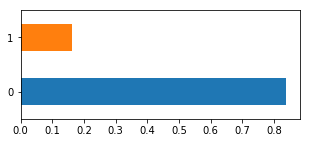

In [13]:
#Step 1: visualize dependent variable to understand data

class_prop = hr['Attrition'].value_counts()/hr.shape[0]  #imbalanced dataset - people who stay in the organization is very high
print(class_prop)
class_prop.plot.barh(figsize = (5,2)) #.plot is used to tell python to visualize

## Step 2: split data into train and test data set

In [14]:
# Step 2: split data into train and test data set

from sklearn.model_selection import train_test_split

train, test = train_test_split(hr_dummy, test_size = 0.3, random_state = 0, stratify = hr_dummy['Attrition'])

#stratified sampling is used to get 70% train and 30% test from 0s sample and 1s sample individually, rather than 70% and 30% 
#split from entire dataset 

print(train.shape)
print(test.shape)

(1029, 56)
(441, 56)


0    863
1    166
Name: Attrition, dtype: int64

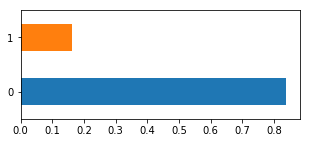

In [22]:
train['Attrition'].value_counts(normalize = True).plot.barh(figsize = (5,2))
train['Attrition'].value_counts()

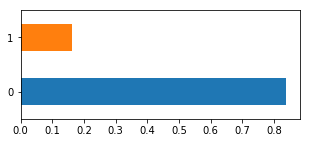

In [23]:
test['Attrition'].value_counts(normalize = True).plot.barh(figsize = (5,2))

In [28]:
#Convert categorical column to numerical column for scikit learn

hr['EducationField'].unique() 

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

## Step 3: Impurity Check

In [61]:
#pure node: impurity = 0
#gini impurity = 1 - P(0)^2 - P(1)^2

print(train['Attrition'].value_counts())

#GI for train datset

print('Gini Impurity = ' + str(1 - np.square(train['Attrition'].value_counts()[0]/train.shape[0]) - 
                               np.square(train['Attrition'].value_counts()[1]/train.shape[0])))

#algorithm will make the split to reduce the GI from 0.27 to minimum possible value

0    863
1    166
Name: Attrition, dtype: int64
Gini Impurity = 0.27059397964378035


In [66]:
print(train[train['OverTime_No'] == 0].shape)
print(train[train['OverTime_No'] == 1].shape)

(294, 56)
(735, 56)


In [71]:
print(train[(train['OverTime_No'] == 0) & (train['Attrition']==0)].shape)
print(train[(train['OverTime_No'] == 0) & (train['Attrition']==1)].shape)

(204, 56)
(90, 56)


In [72]:
1 - np.square(204/294)-np.square(90/294)

0.424822990420658

In [74]:
print(train[(train['OverTime_No'] == 1) & (train['Attrition']==0)].shape)
print(train[(train['OverTime_No'] == 1) & (train['Attrition']==1)].shape)

(659, 56)
(76, 56)


In [75]:
1 - np.square(659/735)-np.square(76/735)

0.18541903836364473

In [78]:
n = train.shape[0]
nl = 294
nr = 735
print('Gini Impurity at this node: ' + str((nl/n*0.424)+(nr/n*0.185)))

Gini Impurity at this node: 0.2532857142857143


In [82]:
print(train['MaritalStatus_Single'].value_counts())
print(1 - np.square(703/train.shape[0]) - np.square(326/train.shape[0]))

0    703
1    326
Name: MaritalStatus_Single, dtype: int64
0.4328846351812974


In [90]:
print(train[(train['MaritalStatus_Single'] == 0) & (train['Attrition'] == 0)].shape)
print(train[(train['MaritalStatus_Single'] == 0) & (train['Attrition'] == 1)].shape)


(624, 56)
(79, 56)


In [91]:
1 - np.square(624/703) - np.square(79/703)

0.19949454582980072

In [92]:
print(train[(train['MaritalStatus_Single'] == 1) & (train['Attrition'] == 0)].shape)
print(train[(train['MaritalStatus_Single'] == 1) & (train['Attrition'] == 1)].shape)


(239, 56)
(87, 56)


In [93]:
1 - np.square(239/326) - np.square(87/326)

0.39130189318378567

In [94]:
(703/1029)*(0.199) + (326/1029)*(0.391)

0.25982798833819243

## Step3a: Gini Impurity for a numerical column

In [108]:
# cuts will be taken at mid-points of combination of 2 unique values in a numerical column

data = train['MonthlyIncome'].sort_values().unique()
for i in range(0,len(data)):
    print(np.mean([data[i],data[i+1]])) #this is where the cut will happen

1030.0
1066.0
1086.0
1145.5
1211.5
1227.5
1246.5
1267.5
1277.5
1320.0
1376.0
1406.5
1491.5
1566.0
1585.0
1606.0
1643.0
1688.5
1704.0
1748.0
1824.5
1868.5
1914.5
1979.0
2007.5
2009.5
2012.0
2015.5
2020.0
2023.0
2026.0
2028.5
2031.0
2037.5
2043.0
2052.5
2061.5
2063.0
2065.0
2068.0
2071.5
2073.5
2080.0
2087.0
2089.0
2091.5
2094.5
2096.5
2098.0
2102.0
2107.0
2112.0
2117.0
2120.0
2124.0
2129.5
2136.5
2142.0
2143.5
2144.5
2146.5
2150.5
2153.5
2161.0
2171.0
2175.0
2178.0
2183.5
2190.5
2200.0
2206.5
2208.5
2211.5
2215.5
2219.0
2225.5
2231.5
2233.5
2236.5
2248.5
2264.0
2270.5
2273.5
2277.0
2282.0
2287.0
2291.0
2294.5
2299.0
2303.5
2305.5
2308.5
2312.0
2313.5
2316.0
2318.5
2321.0
2324.0
2325.5
2327.5
2330.5
2333.5
2337.0
2339.5
2341.0
2345.0
2349.5
2353.5
2359.0
2364.0
2366.5
2367.5
2369.0
2371.0
2374.0
2377.5
2379.5
2383.5
2388.0
2391.5
2396.0
2399.0
2402.0
2405.0
2407.0
2415.0
2424.0
2428.0
2431.0
2434.0
2436.5
2437.5
2438.5
2439.5
2445.0
2450.5
2453.0
2458.0
2469.5
2489.0
2500.5
2503.5
2510.0

IndexError: index 976 is out of bounds for axis 0 with size 976

## Step 4: Algorithm Implementation - Decision Tree

In [24]:
from sklearn import tree

In [25]:
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_y = train['Attrition']
test_y = test['Attrition']

model_1 = tree.DecisionTreeClassifier(max_depth= 3)
model_1.fit(train_x,train_y)
model_1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
with open('model_1.dot','w') as f:
    f = tree.export_graphviz(model_1,
                            out_file = f,
                            feature_names = train_x.columns)
    
#use model1.dot file on webgraphviz.com to generate the graph - this is the output of the decision tree model above

## Step 5: Model Testing

In [45]:
pred_prob = pd.DataFrame(model_1.predict_proba(test_x), columns = ['Prob0', 'Prob1']) #this gives the probability values 
#of 0 and 1
pred_prob

get_class = lambda x: 1 if x > 0.45 else 0
pred_prob['Predicted'] = pred_prob['Prob1'].apply(get_class)
pred_prob['Actual'] = test_y.values
pred_prob.head()

,Prob0,Prob1,Predicted,Actual
0,0.926562,0.073438,0,0
1,0.926562,0.073438,0,0
2,0.865497,0.134503,0,0
3,0.727273,0.272727,0,0
4,0.926562,0.073438,0,0


In [46]:
print(test_y.shape[0])
print((pred_prob['Predicted'] == pred_prob['Actual']).sum())

441
377


## Step 6: Confusion Matrix

In [47]:
print('Accuracy: ' + str((pred_prob['Predicted'] == pred_prob['Actual']).sum()/test_y.shape[0]*100))

Accuracy: 85.4875283446712


In [48]:
import sklearn

In [49]:
c = sklearn.metrics.confusion_matrix(pred_prob['Actual'], pred_prob['Predicted'])
#print(c)

tn, fp, fn, tp = c.ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)
f_score = (2*sens*precision)/(sens+precision)
precision = tp/(tp+fp)
print(sens, spec, f_score, precision)

#play with cut off probability to increase/decrease sensitivity specificity - depending upon your business problem

0.11267605633802817 0.9972972972972973 0.18172839506172841 0.8888888888888888


## Random Forest Algorithm

In [11]:
from sklearn import tree

In [12]:
from sklearn.ensemble import RandomForestClassifier
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_y = train['Attrition']
test_y = test['Attrition']

model_2 = RandomForestClassifier(n_estimators= 500) #we grow the tree to the maximum limit and then go for pruning
model_2.fit(train_x,train_y)
model_2

pred_prob = pd.DataFrame(model_2.predict_proba(test_x), columns = ['Prob0', 'Prob1']) #this gives the probability values 
#of 0 and 1
pred_prob

get_class = lambda x: 1 if x > 0.40 else 0
pred_prob['Predicted'] = pred_prob['Prob1'].apply(get_class)
pred_prob['Actual'] = test_y.values
pred_prob.head()

c = sklearn.metrics.confusion_matrix(pred_prob['Actual'], pred_prob['Predicted'])

tn, fp, fn, tp = c.ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print(sens,spec)

#play with cut off probability to increase/decrease sensitivity specificity - depending upon your business problem

0.28169014084507044 0.9837837837837838


## Boosting
### Adaboost, Gradient Boosting, XG Boost

In [32]:
#Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_y = train['Attrition']
test_y = test['Attrition']

model_3 = AdaBoostClassifier() #we grow the tree to the maximum limit and then go for pruning
model_3.fit(train_x,train_y)
model_3

pred_prob = pd.DataFrame(model_3.predict_proba(test_x), columns = ['Prob0', 'Prob1']) #this gives the probability values 
#of 0 and 1
pred_prob

get_class = lambda x: 1 if x > 0.50 else 0
pred_prob['Predicted'] = pred_prob['Prob1'].apply(get_class)
pred_prob['Actual'] = test_y.values
pred_prob.head()

c = sklearn.metrics.confusion_matrix(pred_prob['Actual'], pred_prob['Predicted'])

tn, fp, fn, tp = c.ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print(sens,spec)

#play with cut off probability to increase/decrease sensitivity specificity - depending upon your business problem

0.30985915492957744 0.9621621621621622


In [31]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_y = train['Attrition']
test_y = test['Attrition']

model_4 = GradientBoostingClassifier(n_estimators=500) #we grow the tree to the maximum limit and then go for pruning
model_4.fit(train_x,train_y)
model_4

pred_prob = pd.DataFrame(model_4.predict_proba(test_x), columns = ['Prob0', 'Prob1']) #this gives the probability values 
#of 0 and 1
pred_prob

get_class = lambda x: 1 if x > 0.50 else 0
pred_prob['Predicted'] = pred_prob['Prob1'].apply(get_class)
pred_prob['Actual'] = test_y.values
pred_prob.head()

c = sklearn.metrics.confusion_matrix(pred_prob['Actual'], pred_prob['Predicted'])

tn, fp, fn, tp = c.ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print(sens,spec)

#play with cut off probability to increase/decrease sensitivity specificity - depending upon your business problem


0.29577464788732394 0.972972972972973


### SVM

In [33]:

from sklearn.svm import SVC
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_y = train['Attrition']
test_y = test['Attrition']

model_5 = SVC(C = 1000, kernel = 'linear') #we grow the tree to the maximum limit and then go for pruning
model_5.fit(train_x,train_y)
model_5

pred_prob = pd.DataFrame(model_5.predict_proba(test_x), columns = ['Prob0', 'Prob1']) #this gives the probability values 
#of 0 and 1
pred_prob

get_class = lambda x: 1 if x > 0.50 else 0
pred_prob['Predicted'] = pred_prob['Prob1'].apply(get_class)
pred_prob['Actual'] = test_y.values
pred_prob.head()

c = sklearn.metrics.confusion_matrix(pred_prob['Actual'], pred_prob['Predicted'])

tn, fp, fn, tp = c.ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print(sens,spec)

#play with cut off probability to increase/decrease sensitivity specificity - depending upon your business problem


AttributeError: predict_proba is not available when  probability=False

### Step: sklearn Decision Trees- Parameter Tuning

In [34]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
#code will be shared by kathirmani
#setup parameters and distribution to sample from:

param_dist = {'max depth': [7,8,9,10], 'min_samples_leaf': list(range(1,5)), 'criterion':['gini', 'entropy']}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, param_dist)

tree_cv.fit(train_x, train_y)



In [1]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.model